# Logistic Regression to predict extra-marital affair using the affair dataset 

In [164]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as split

from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [85]:
#Load dataset
dataset = sm.datasets.fair
data = dataset.load_pandas().data
print(dataset.TITLE)
print(dataset.DESCRSHORT)
print(dataset.DESCRLONG)
print(dataset.NOTE)
print(dataset.SOURCE)


Affairs dataset
Extramarital affair data.
Extramarital affair data used to explain the allocation
of an individual's time among work, time spent with a spouse, and time
spent with a paramour. The data is used as an example of regression
with censored data.
::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [87]:
data.shape

(6366, 9)

In [88]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [89]:
data.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


In [90]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


Looks like there are no missing data


## Data Preprocessing 

#### Lets treat this as a classification , where we can provide a label 0 or 1 for having an affair or not. For that we need to put some threshold and make two categories using affairs columns.

In [91]:
data['affair'] = (data.affairs > 0).astype(int)

#Lets drop affairs column
data.drop(['affairs'],axis=1,inplace =True)

In [92]:
data = data.rename(columns={"rate_marriage": "rateMarriage", "yrs_married": "yearsMarried","occupation_husb":"husbandOccupation"})

In [93]:
data.head()

,rateMarriage,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


#### We will add an intercept column as well as dummy variables for occupation and husbandOccupation, because these are more like categorical variables. The dmatrices function from patsy module can do that using formula language.

In [112]:
##Using patsy module

Y,X = dmatrices('affair ~ rateMarriage + age + yearsMarried + children + \
                religious + educ +C(occupation) +C(husbandOccupation)',data,return_type='dataframe')

X.head(5)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(husbandOccupation)[T.2.0],C(husbandOccupation)[T.3.0],C(husbandOccupation)[T.4.0],C(husbandOccupation)[T.5.0],C(husbandOccupation)[T.6.0],rateMarriage,age,yearsMarried,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [123]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(husbandOccupation)[T.2.0]', 'C(husbandOccupation)[T.3.0]',
       'C(husbandOccupation)[T.4.0]', 'C(husbandOccupation)[T.5.0]',
       'C(husbandOccupation)[T.6.0]', 'rateMarriage', 'age', 'yearsMarried',
       'children', 'religious', 'educ'],
      dtype='object')

In [125]:
#Lets rename the column names
X.rename(columns={'C(occupation)[T.2.0]' :'occ_2', 'C(occupation)[T.3.0]':'occ_3',
       'C(occupation)[T.4.0]':'occ_4', 'C(occupation)[T.5.0]':'occ_5', 'C(occupation)[T.6.0]':'occ_6',
       'C(husbandOccupation)[T.2.0]':'husocc_2', 'C(husbandOccupation)[T.3.0]':'husocc_3',
       'C(husbandOccupation)[T.4.0]':'husocc_4', 'C(husbandOccupation)[T.5.0]':'husocc_5',
       'C(husbandOccupation)[T.6.0]':'husocc_6'},inplace=True)
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,husocc_2,husocc_3,husocc_4,husocc_5,husocc_6,rateMarriage,age,yearsMarried,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [126]:
#Lets check for any null values present

df = pd.concat([X,Y],axis=1)
df.isnull().sum()

Intercept          0
occ_2              0
occ_3              0
occ_4              0
occ_5              0
occ_6              0
husocc_2           0
husocc_3           0
husocc_4           0
husocc_5           0
husocc_6           0
rateMarriage       0
age                0
yearsMarried       0
children           0
religious          0
educ               0
affair          2260
dtype: int64

#### Since this is a classification , we need a more or less balanced dataset. Lets check the balance in the dataset

In [127]:
print(df[df['affair'] ==1].shape)
print(df[df['affair'] ==0].shape)

(2053, 18)
(4313, 18)


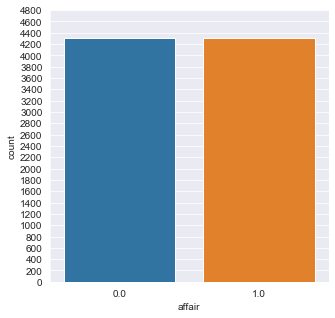

In [158]:
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.countplot(df['affair'])
plt.yticks(range(0,5000,200))
plt.show()

#### As dataset is imbalanced because class 0 is almost double of class 1 , we will do up sampling to balance the dataset.

In [154]:
rdm=RandomOverSampler()
X,y=rdm.fit_sample(X,y)
df=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(df[df["affair"]==0].shape)
print(df[df["affair"]==1].shape)


(4313, 17)
(4313, 17)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


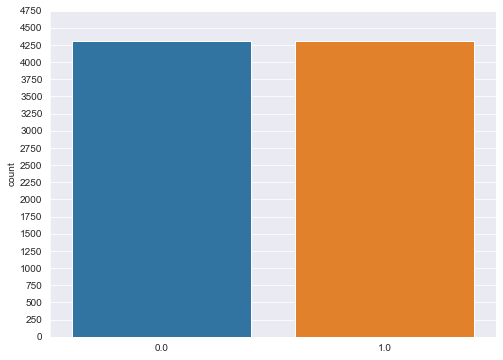

In [121]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))# converting y into array form to plot
plt.yticks(range(0,5000,250)) 
plt.show()

In [130]:
df.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,husocc_2,husocc_3,husocc_4,husocc_5,husocc_6,rateMarriage,age,yearsMarried,children,religious,educ,affair
count,8626.0,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000
mean,1.0,0.130536,0.448180,0.271621,0.125087,0.018549,0.205889,0.081266,0.316717,0.284025,0.080918,3.995711,29.430617,9.547067,1.481451,2.390795,14.153953,0.500000
std,0.0,0.336911,0.497336,0.444821,0.330837,0.134932,0.404373,0.273259,0.465223,0.450975,0.272725,1.008074,6.823206,7.294587,1.441800,0.871689,2.170996,0.500029
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,22.000000,2.500000,0.000000,2.000000,12.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,0.500000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,1.000000


## Data Visualization

### How rate of marriage affects affair 

Text(0, 0.5, 'Frequency')

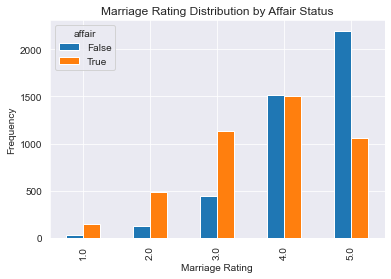

In [133]:
pd.crosstab(df.rateMarriage, df.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

From above figure we can say large bunch of women is satisfied with their married life irrespective of their affairs.

### Let’s see how education make an impact on married life

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


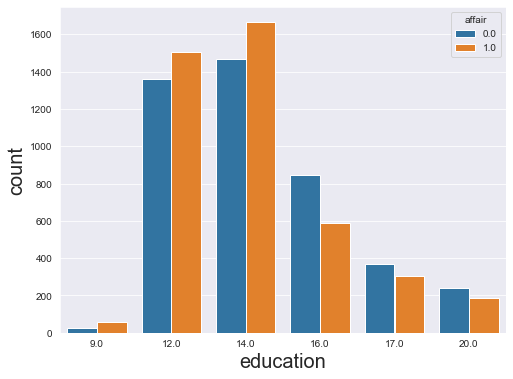

In [139]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
#sns.countplot("educ",hue="affair",data=df,order=df["educ"].value_counts().index)
sns.countplot("educ",hue="affair",data=df)
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Women who is doing white collar jobs having less chance of affair and women with graduation and higher educational background also has less chance of affair but for those women who is in college and have lower literacy has shown more interest in extra marital affairs.

### Impact of religion

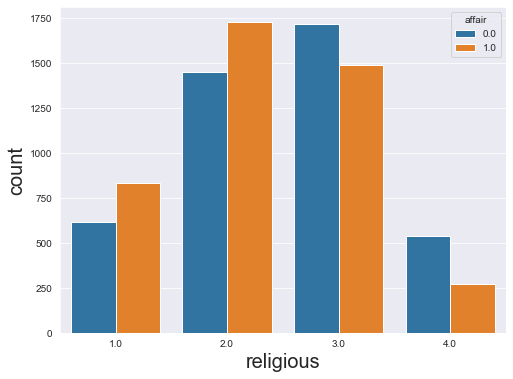

In [141]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("religious",hue="affair",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

More religious lesser will be the chance of having extra marital affair.

# Data Modelling

### Running logistic regression on the entire data set, and see how accurate it is!

In [153]:

model = LogisticRegression()
model = model.fit(X, y)

#accuracy obtained from training dataset
print("Accuracy:",model.score(X, y))

Accuracy: 0.679341525620218


#### what percentage had affairs?

In [146]:

y.mean()

affair    0.5
dtype: float64

Only 50% of the women had affairs, which means that the model can obtain 50% accuracy by always predicting “no”. So we’re doing better than the null error rate, but not much.

#### We will check the coefficients

In [151]:
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'husocc_2',
        'husocc_3', 'husocc_4', 'husocc_5', 'husocc_6', 'rateMarriage', 'age',
        'yearsMarried', 'children', 'religious', 'educ'],
       dtype='object'),
 array([[ 1.73603901],
        [ 0.12483064],
        [ 0.44046655],
        [ 0.14721784],
        [ 0.74740925],
        [ 0.43474787],
        [ 0.40300195],
        [ 0.61380337],
        [ 0.36361701],
        [ 0.38307649],
        [ 0.4325126 ],
        [-0.7255667 ],
        [-0.06334457],
        [ 0.11197707],
        [ 0.0143304 ],
        [-0.36996494],
        [ 0.02326174]]))

Increases in marriage rating and religiousness corresponds to decrease in the likelihood of having an affair. For both, wife’s occupation and the husband’s occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

### Model Evaluation Using a Validation Set
Let’s split the data into a training and a test set.

In [161]:
# evaluate the model by splitting the data-set into train and test sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3)

model2 = LogisticRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
print(y_test)

      affair
2312     0.0
7978     1.0
4658     0.0
5136     0.0
1410     1.0
...      ...
7374     1.0
161      1.0
3731     0.0
634      1.0
7262     1.0

[2588 rows x 1 columns]


In [162]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.68135061, 0.31864939],
       [0.51039694, 0.48960306],
       [0.80113588, 0.19886412],
       ...,
       [0.31836491, 0.68163509],
       [0.08960649, 0.91039351],
       [0.15688889, 0.84311111]])

classifier is predicting 1 (having an affair) any time the probability in second column is greater than 0.5.

#### Now let’s generate some evaluation metrics.

In [165]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.6819938176197836
0.7485089000170206


The accuracy is 68%, which is the same as we obtained when training and predicting on the same data.

We can see the confusion matrix and a classification report with other metrics.

<AxesSubplot:>

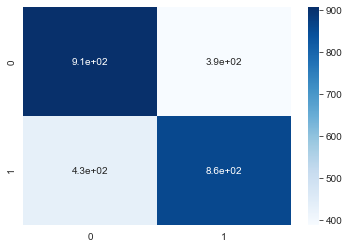

In [167]:
import seaborn as sns
conf_matrix = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(conf_matrix, annot=True,cmap='Blues')

In [168]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69      1295
         1.0       0.69      0.66      0.68      1293

    accuracy                           0.68      2588
   macro avg       0.68      0.68      0.68      2588
weighted avg       0.68      0.68      0.68      2588



### Model Evaluation Using Cross-Validation
Now let’s use 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [170]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.67902665, 0.67670915, 0.69872538, 0.69177289, 0.67902665,
        0.67207416, 0.67053364, 0.63341067, 0.68329466, 0.71113689]),
 0.6795710748401007)

Looks good. It’s still performing at 68% accuracy.

We have developed a classification model using Logistic Regression and got accuracy of 68%. We can perform hyper-parameter tuning to get better accuracy out of the model